Based on Henrikki Tenkanen’s online course (includes lots of other good resources). 

We also use data from the Helsinki Region-Travel Time Matrix 2015. Toivonen, T., M. Salonen, H. Tenkanen, P. Saarsalmi, T. Jaakkola & J. Järvi (2014). Joukkoliikenteellä, autolla ja kävellen: Avoin saavutettavuusaineisto pääkaupunkiseudulla. Terra 126: 3, 127-136.




# Part 1 - Geocoding

We're starting with a text file of 10 addresses in the Calgary area

In [2]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import geocode
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

address_data = pd.read_csv("calgary_addresses.txt", sep=';')
address_data.head()

,id,addr
0,1000,"1900 Heritage Dr SW, Calgary, AB T2V 2X3, Canada"
1,1001,"2500 University Dr NW, Calgary, AB T2N 1N4, Ca..."
2,1002,"1410 Olympic Way SE, Calgary, AB T2G 2W1, Canada"
3,1003,"210 St Georges Dr NE, Calgary, AB T2E 5T2, Canada"
4,1004,"101 9 Ave SW, Calgary, AB T2P 1J9, Canada"


Create a GeoDataFrame that contains our original address and a ‘geometry’ column containing Shapely Point with coordinates (objects that we can use for exporting the addresses to a Shapefile).

In [16]:
#Fix Geocoder Time Out Error
from geopy.exc import GeocoderTimedOut
from time import sleep

def do_geocode(address):
    try:
        sleep(1)
        return geocode(address, provider='nominatim')
    except GeocoderTimedOut:
        return do_geocode(address)

geo = do_geocode(address_data['addr'])
geo.head()

,geometry,address
0,POINT (-114.10870 50.98405),"1900, Heritage Drive SW, Eagle Ridge, Calgary,..."
1,POINT (-114.13266 51.07746),"Brew and Blendz, 2500, University Drive NW, Un..."
2,POINT (-114.05441 51.03548),"Stampede Park, 1410, Olympic Way SE, Victoria ..."
3,POINT (-114.02575 51.05114),"St. George's Drive NE, Inglewood, Calgary, Alb..."
4,POINT (-114.06678 51.04470),"9 Avenue SW, Victoria Park, Downtown Commercia..."


In [17]:
#Join the two dataframes; add the geometry column to the original columns
geo_join = geo.join(address_data)
geo_join.head()

,geometry,address,id,addr
0,POINT (-114.10870 50.98405),"1900, Heritage Drive SW, Eagle Ridge, Calgary,...",1000,"1900 Heritage Dr SW, Calgary, AB T2V 2X3, Canada"
1,POINT (-114.13266 51.07746),"Brew and Blendz, 2500, University Drive NW, Un...",1001,"2500 University Dr NW, Calgary, AB T2N 1N4, Ca..."
2,POINT (-114.05441 51.03548),"Stampede Park, 1410, Olympic Way SE, Victoria ...",1002,"1410 Olympic Way SE, Calgary, AB T2G 2W1, Canada"
3,POINT (-114.02575 51.05114),"St. George's Drive NE, Inglewood, Calgary, Alb...",1003,"210 St Georges Dr NE, Calgary, AB T2E 5T2, Canada"
4,POINT (-114.06678 51.04470),"9 Avenue SW, Victoria Park, Downtown Commercia...",1004,"101 9 Ave SW, Calgary, AB T2P 1J9, Canada"


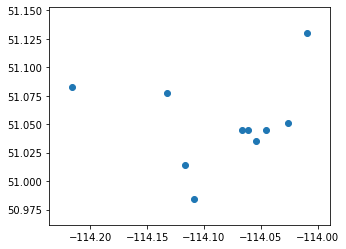

In [18]:
geo_join.plot()

In [19]:
#If you want to export the shape file to use in Tableau
geo_join.to_file("addresses_calgary.shp")

Let's add the map of Calgary to the plot of addresses, using a geojson file of Calgary's neighborhoods

From https://data.calgary.ca/Base-Maps/Community-Boundaries/ab7m-fwn6


In [20]:
calgary_geo = gpd.read_file("CalgaryBoundaries.geojson")
calgary_geo

,comm_structure,name,sector,class_code,srg,class,comm_code,geometry
0,INNER CITY,SUNALTA,CENTRE,1,BUILT-OUT,Residential,SNA,"POLYGON ((-114.10061 51.04799, -114.10056 51.0..."
1,BUILDING OUT,WEST SPRINGS,WEST,1,DEVELOPING,Residential,WSP,"POLYGON ((-114.18781 51.06151, -114.18781 51.0..."
2,OTHER,12A,SOUTHEAST,4,N/A,Residual Sub Area,12A,"POLYGON ((-113.86945 50.97957, -113.86945 50.9..."
3,1950s,WINDSOR PARK,CENTRE,1,BUILT-OUT,Residential,WND,"POLYGON ((-114.08152 51.00872, -114.08137 51.0..."
4,OTHER,UNIVERSITY OF CALGARY,NORTHWEST,1,BUILT-OUT,Residential,UOC,"POLYGON ((-114.14103 51.07436, -114.14103 51.0..."
5,2000s,MEDICINE HILL,WEST,1,BUILT-OUT,Residential,MDH,"POLYGON ((-114.19455 51.08170, -114.19377 51.0..."
6,EMPLOYMENT,HORIZON,NORTHEAST,2,N/A,Industrial,HOR,"POLYGON ((-113.99729 51.09832, -113.99729 51.0..."
7,INNER CITY,INGLEWOOD,CENTRE,1,BUILT-OUT,Residential,ING,"POLYGON ((-114.03680 51.04400, -114.03675 51.0..."
8,EMPLOYMENT,ROYAL VISTA,NORTHWEST,2,N/A,Industrial,RYV,"POLYGON ((-114.21167 51.15423, -114.21144 51.1..."
9,1950s,OGDEN,SOUTHEAST,1,BUILT-OUT,Residential,OGD,"POLYGON ((-114.01308 50.99973, -114.01172 50.9..."


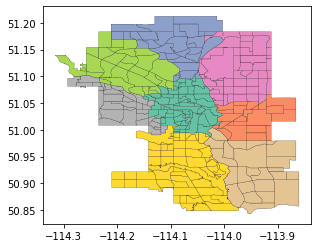

In [22]:
#We can plot Calgary's neighborhoods - mapping sector to color
calgary_geo.plot(column="sector", cmap="Set2", edgecolor='black', linewidth=.2)


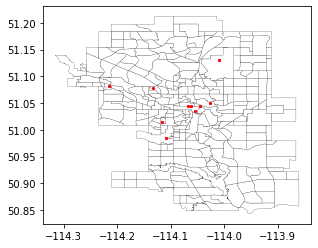

In [23]:
#Use the map of Calgary as the base, and add the points
base=calgary_geo.plot(color='white', edgecolor='black', linewidth=.2)
geo_join.plot(ax=base, marker='o', color='red', markersize=5)

# Part 2 - Retrieving OpenStreetMap data

Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [25]:
#Import OSMnx
import osmnx as ox

place_name="Calgary, Alberta, Canada"
graph = ox.graph_from_place(place_name)

#Create a network of Calgary's streets

fig, ax = ox.plot_graph(graph)
plt.tight_layout()

ImportError: cannot import name 'CRS' from 'pyproj' (/Users/Ellsworth/anaconda3/lib/python3.7/site-packages/pyproj/__init__.py)

In [8]:
#We can download information about buildings in Calgary

buildings = ox.footprints_from_place(place_name)
buildings.head()

NameError: name 'ox' is not defined

In [9]:
#We can download a polygon that fits Calgary's boundaries
area = ox.gdf_from_place(place_name)
area

NameError: name 'ox' is not defined

In [10]:
#We can extract the nodes and edges that make up the street network

nodes, edges = ox.graph_to_gdfs(graph)
nodes.head()

NameError: name 'ox' is not defined

In [11]:
edges.head()

NameError: name 'edges' is not defined

NameError: name 'area' is not defined

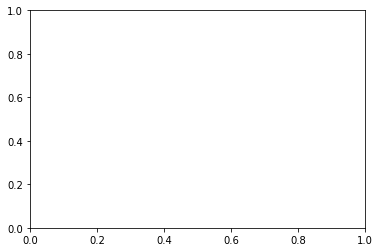

In [12]:
fig, ax = plt.subplots()
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=.1, edgecolor='#BC8F8F')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
plt.tight_layout()

# Part 3 - Visualizing Binned Data

For Part 3, we're going to visualize travel time data from Helsinki, Finland.

This data originally came from blogs.helsinki.fi (https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix-2015/), where you can find descriptions of the attributes

In [13]:
fp = "TravelTimes_to_5975375_RailwayStation_Helsinki.geojson"

acc = gpd.read_file(fp)
acc.head(5)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [14]:
#Travel time by public transportation in rush hour traffic >= 0
acc = acc.loc[acc['pt_r_tt'] >=0]

Let's plot travel time to desination during rush hour

Plot using 9 bins and cluster the values using "Fisher Jenks" method. "Jenks minimizes each cluster's average deviation from the mean, while maximizing deviation from the means of the other groups."

https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization

ImportError: The 'mapclassify' or 'pysal' package is required to use the 'scheme' keyword

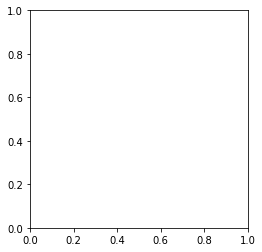

In [15]:
acc.plot(column="pt_r_tt", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

plt.tight_layout()

In [ ]:
#Plot walking distance to city center
acc.plot(column="walk_d", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0, legend=True)

plt.tight_layout()

Let's use pysal to cluster our data by public transit travel times

In [ ]:
from pysal.viz import mapclassify

n_classes=9

In [2]:
#We need to make the classifier and apply it to the column
fj = mapclassify.FisherJenks.make(k=n_classes)

bins = acc[['pt_r_tt']].apply(fj)
bins.head()

NameError: name 'mapclassify' is not defined

In [3]:
#We should rename this new column to something unique
bins.columns = ['nb_pt_r_tt']

#and addd it back to the original table
acc = acc.join(bins)
acc.head()

NameError: name 'bins' is not defined

In [4]:
#Plot the new column of clustered travel times

acc.plot(column="nb_pt_r_tt", linewidth=0, legend=True)
plt.tight_layout()

NameError: name 'acc' is not defined

# Creating a Custom Filter

Let's create a filter for this data. Assume we want to find locations that are more than 4 km away from city center, but travel time during rush hour is less than or equal to 20 minutes.

In [5]:
#Add a column for our suitable area
acc["Suitable_area"] = None

NameError: name 'acc' is not defined

In [6]:
def customFilter(row, src_col1, src_col2, threshold1, threshold2, output_col):
    # 1. If the value in src_col1 is LOWER than the threshold1 value
    # 2. AND the value in src_col2 is HIGHER than the threshold2 value, give value 1, otherwise give 0

    if row[src_col1] < threshold1 and row[src_col2] > threshold2:
        # Update the output column with value 0
        row[output_col] = 1
    # If area of input geometry is higher than the threshold value update with value 1
    else:
        row[output_col] = 0

    # Return the updated row
    return row

In [7]:
#Apply filter and add value to 'suitable_area' column
acc = acc.apply(customFilter, src_col1='pt_r_tt', src_col2='walk_d', threshold1=20, threshold2=4000, output_col="Suitable_area", axis=1)

NameError: name 'acc' is not defined

In [8]:
acc.plot(column="Suitable_area", linewidth=0);

NameError: name 'acc' is not defined